**Zad. 1.1**

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Zad. 1.2**

In [ ]:
df = pd.read_csv('housing.csv', sep='\s+', header=None)
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.columns = columns
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


**Zad. 1.3**

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**Zad. 1.4**

In [ ]:
print(df.isnull().any())

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool


**Zad. 1.5**

In [ ]:
df.dtypes
df['CHAS'] = df['CHAS'].astype(float)
df['RAD'] = df['RAD'].astype(float)
df.dtypes

,0
CRIM,float64
ZN,float64
INDUS,float64
CHAS,float64
NOX,float64
RM,float64
AGE,float64
DIS,float64
RAD,float64
TAX,float64


**Zad. 1.6**

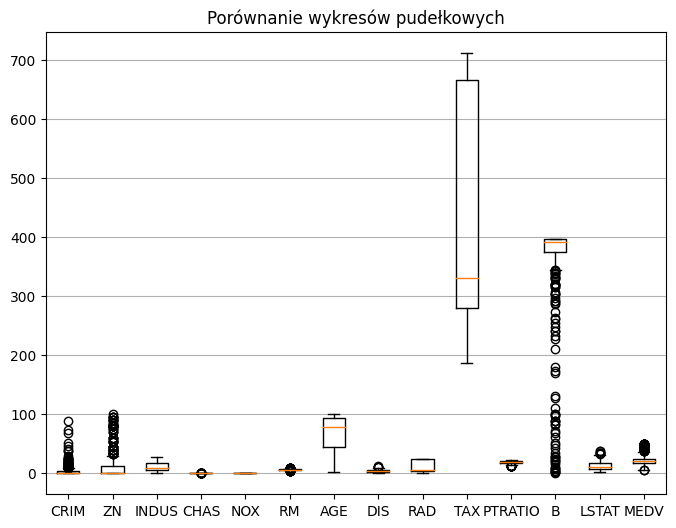

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot([df[col] for col in df.columns], labels=df.columns)
plt.grid(True, axis='y')
plt.title('Porównanie wykresów pudełkowych')
plt.show()


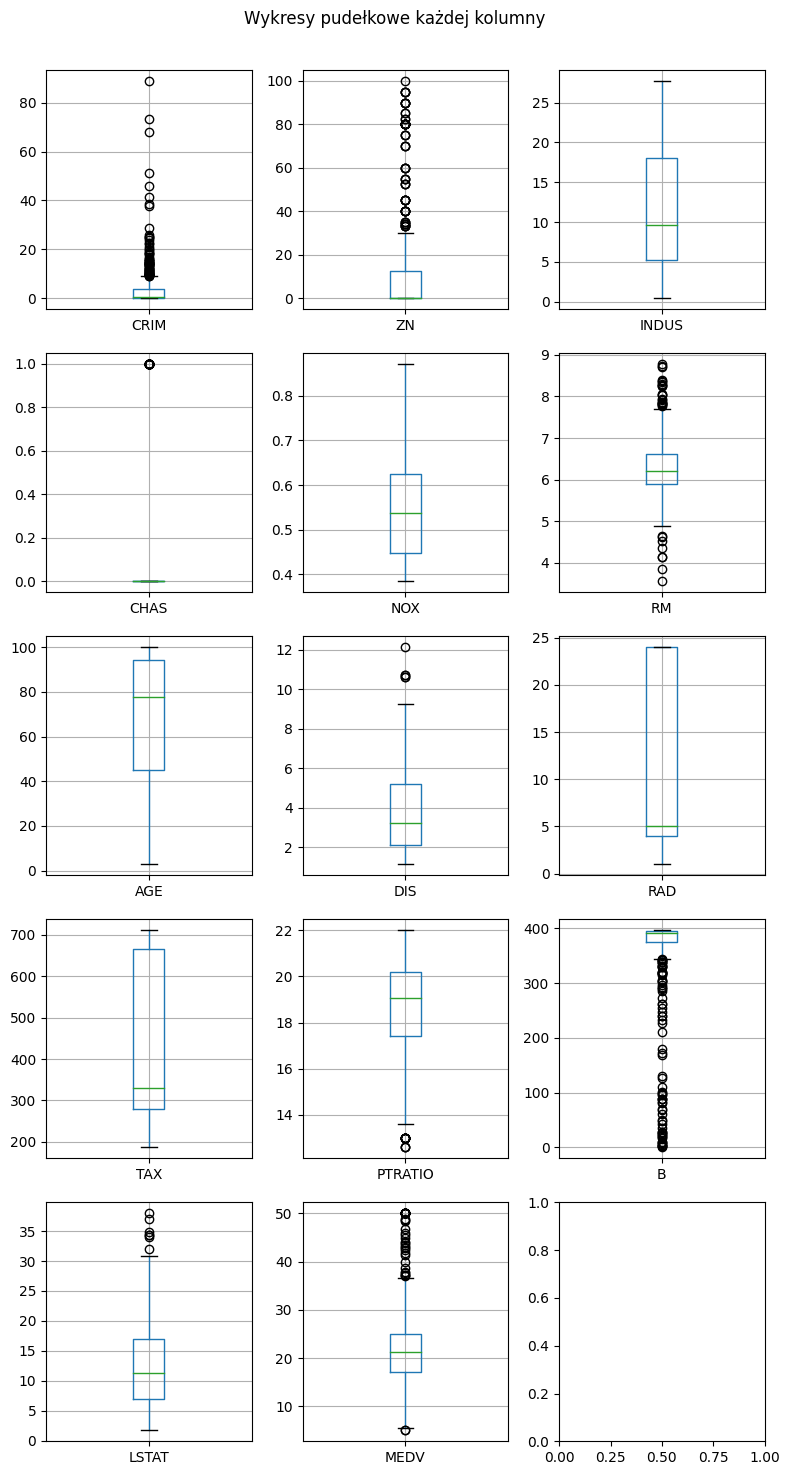

In [ ]:
plt.subplots(5, 3, figsize=(8, 15))

for i, col in enumerate(df.columns):
  plt.subplot(5, 3, i+1)
  df.boxplot(column=col)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle('Wykresy pudełkowe każdej kolumny')
plt.show()

**Zad. 1.7**

In [ ]:
outliers_percent = {}

for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    percent_outliers = (len(outliers) / len(df)) * 100
    outliers_percent[col] = percent_outliers

for col, percent in outliers_percent.items():
    print(f'Kolumna {col}, odsetek wartości odstających: {percent:.2f}%')

Kolumna CRIM, odsetek wartości odstających: 13.04%
Kolumna ZN, odsetek wartości odstających: 13.44%
Kolumna INDUS, odsetek wartości odstających: 0.00%
Kolumna CHAS, odsetek wartości odstających: 6.92%
Kolumna NOX, odsetek wartości odstających: 0.00%
Kolumna RM, odsetek wartości odstających: 5.93%
Kolumna AGE, odsetek wartości odstających: 0.00%
Kolumna DIS, odsetek wartości odstających: 0.99%
Kolumna RAD, odsetek wartości odstających: 0.00%
Kolumna TAX, odsetek wartości odstających: 0.00%
Kolumna PTRATIO, odsetek wartości odstających: 2.96%
Kolumna B, odsetek wartości odstających: 15.22%
Kolumna LSTAT, odsetek wartości odstających: 1.38%
Kolumna MEDV, odsetek wartości odstających: 7.91%


**Zad. 1.8**

In [ ]:
correlation_matrix = df.corr()

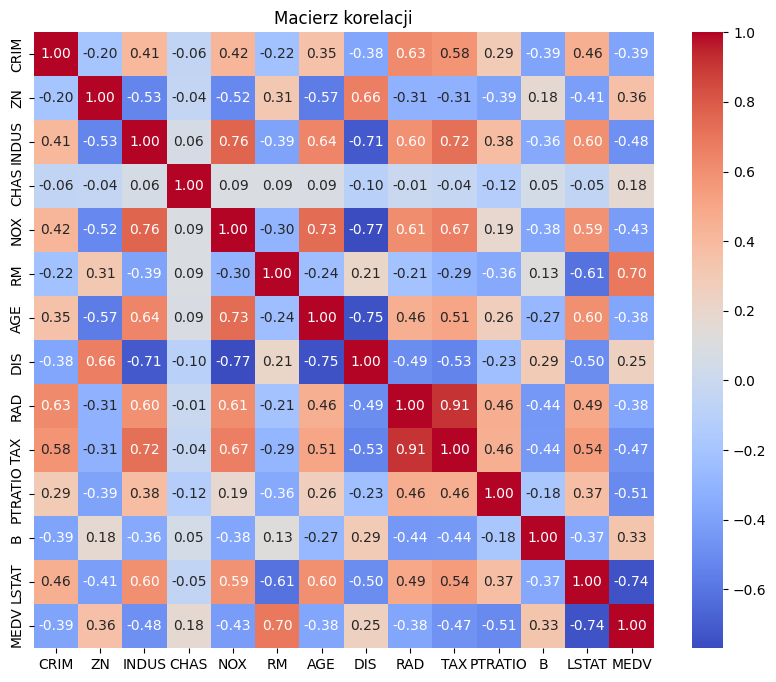

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Macierz korelacji')
plt.show()

**Zad. 1.9**

<Figure size 1000x800 with 0 Axes>

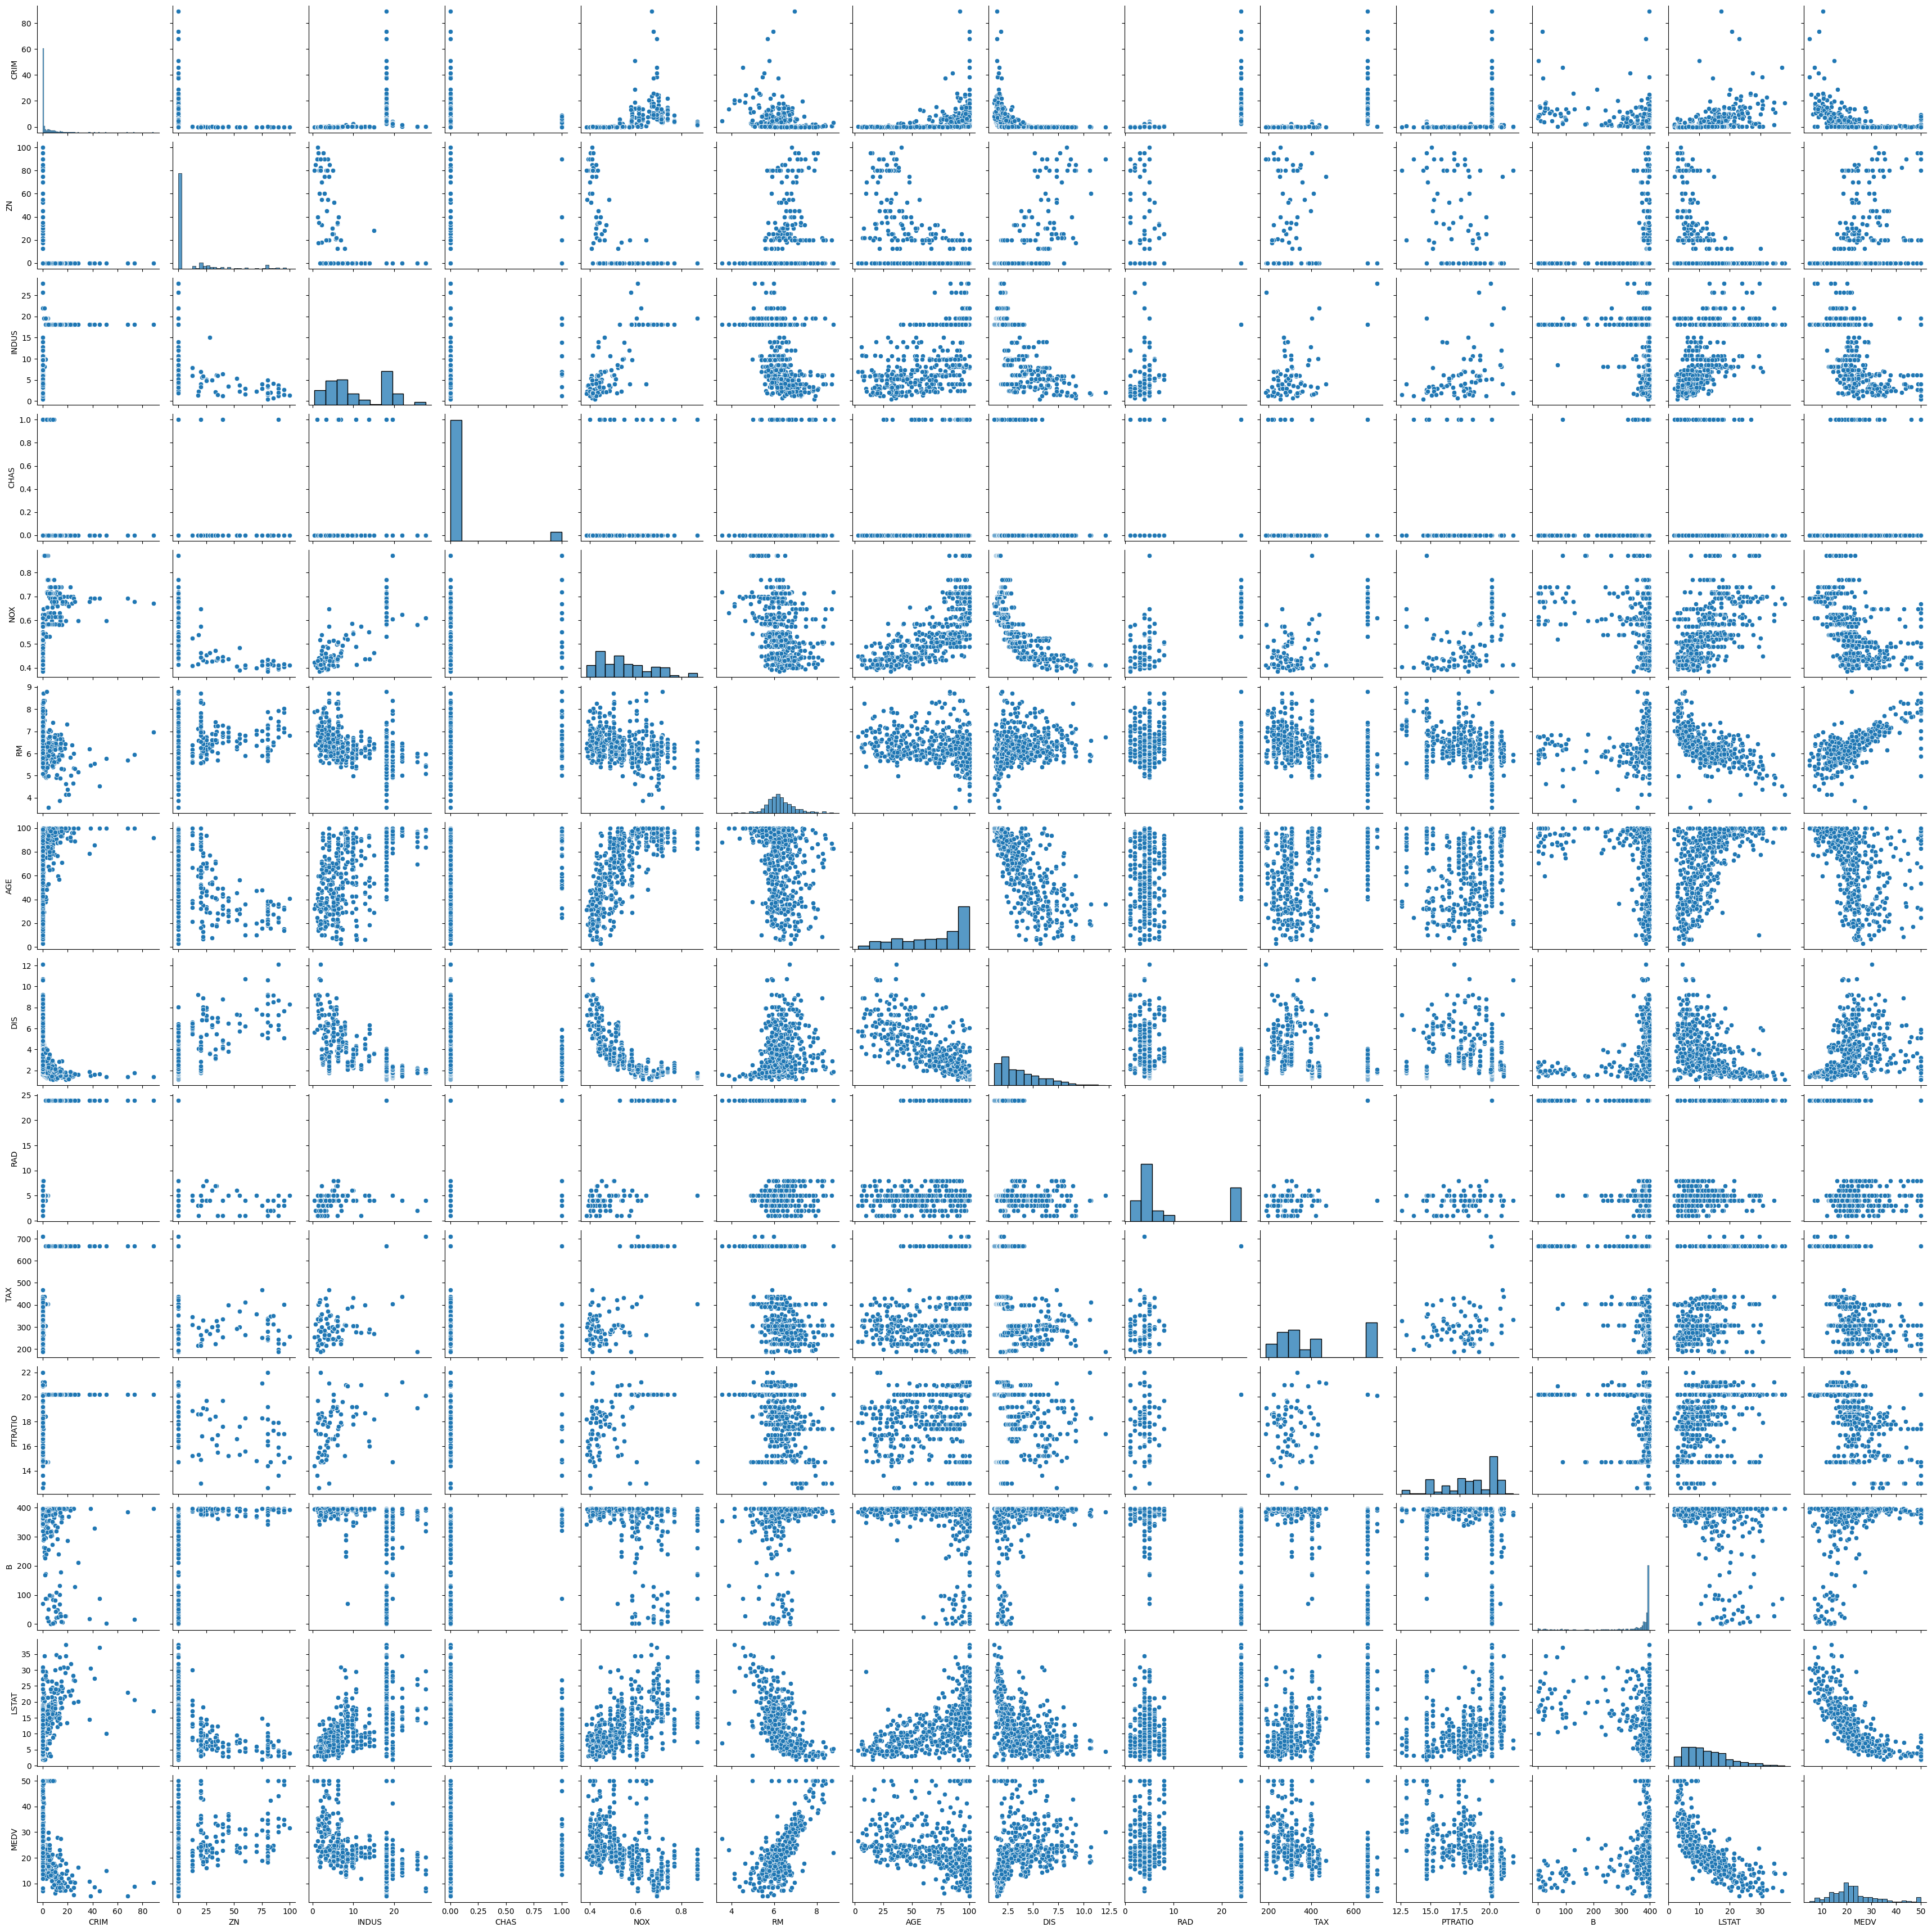

In [ ]:
plt.figure(figsize=(10, 8))
sns.pairplot(df)
plt.show()

**Zad. 1.10**

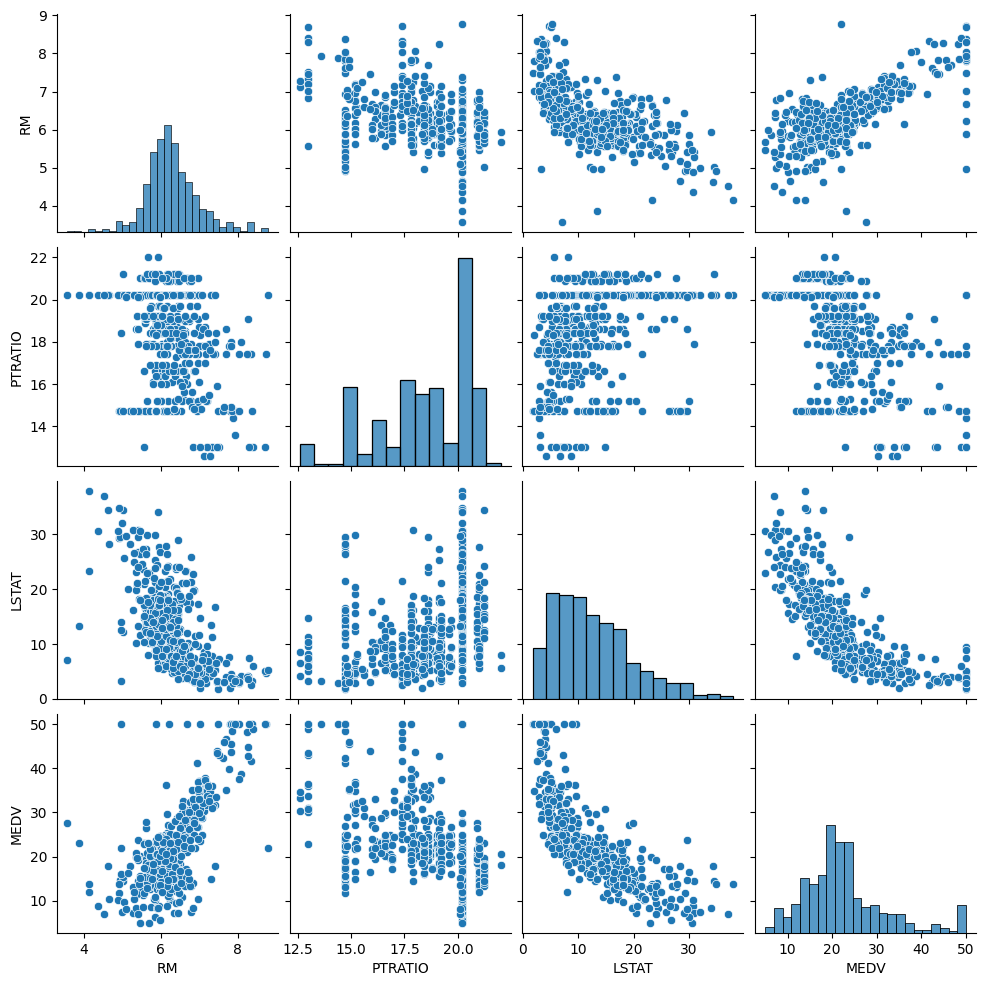

In [ ]:
corr_medv = correlation_matrix['MEDV']
high_corr = correlation_matrix[(corr_medv > 0.5) | (corr_medv < -0.5)]['MEDV']

df_selected = df[high_corr.index]

sns.pairplot(df_selected)
plt.show()

**Zad. 1.11**

In [ ]:
X = df.drop('MEDV', axis=1)

print(X.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


**Zad. 1.12**

In [ ]:
y = df['MEDV']

print(y.head())

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


**Zad. 1.13**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

**Zad. 1.14-15**

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

print("Współczynniki nachylenia (coef_):", model.coef_)
print("Punkt przecięcia (intercept_):", model.intercept_)

Współczynniki nachylenia (coef_): [-9.89913563e-02  4.25047578e-02  1.67390094e-02  3.06437882e+00
 -1.56462528e+01  4.01888422e+00 -8.31558474e-04 -1.44628034e+00
  2.67827281e-01 -1.04725485e-02 -8.88651815e-01  8.25262805e-03
 -5.49367192e-01]
Punkt przecięcia (intercept_): 32.90613090863698


**Zad. 1.16-17**

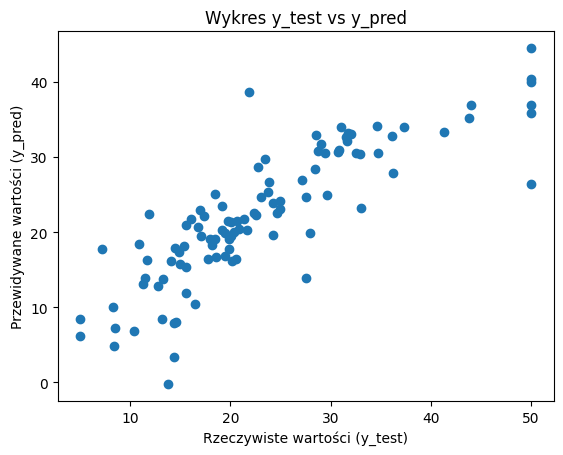

In [ ]:
y_pred = model.predict(X_test)

import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Rzeczywiste wartości (y_test)")
plt.ylabel("Przewidywane wartości (y_pred)")
plt.title("Wykres y_test vs y_pred")
plt.show()

**Zad. 1.18**

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", round(mae, 2))
print("Mean Squared Error (MSE):", round(mse, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))
print("R-squared (R2):", round(r2, 4))

Mean Absolute Error (MAE): 4.0
Mean Squared Error (MSE): 33.27
Root Mean Squared Error (RMSE): 5.77
R-squared (R2): 0.7035


**Zad. 1.19**

In [ ]:
ridge = Ridge(alpha=0.5)

ridge.fit(X_train, y_train)

print("Ridge - Współczynniki nachylenia (coef_):", ridge.coef_)
print("Ridge - Punkt przecięcia (intercept_):", ridge.intercept_)

y_pred_ridge = ridge.predict(X_test)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = root_mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge - Mean Absolute Error (MAE):", round(mae_ridge, 2))
print("Ridge - Mean Squared Error (MSE):", round(mse_ridge, 2))
print("Ridge - Root Mean Squared Error (RMSE):", round(rmse_ridge, 2))
print("Ridge - R-squared (R2):", round(r2_ridge, 4))

Ridge - Współczynniki nachylenia (coef_): [-9.79174176e-02  4.31536763e-02 -2.23126264e-04  3.03379451e+00
 -1.11122248e+01  4.04715476e+00 -5.10395997e-03 -1.37586671e+00
  2.58361218e-01 -1.08329348e-02 -8.38753714e-01  8.49360315e-03
 -5.53909663e-01]
Ridge - Punkt przecięcia (intercept_): 29.717375635994458
Ridge - Mean Absolute Error (MAE): 4.01
Ridge - Mean Squared Error (MSE): 33.6
Ridge - Root Mean Squared Error (RMSE): 5.8
Ridge - R-squared (R2): 0.7005


In [ ]:
lasso = Lasso(alpha=0.5)

lasso.fit(X_train, y_train)

print("Lasso - Współczynniki nachylenia (coef_):", lasso.coef_)
print("Lasso - Punkt przecięcia (intercept_):", lasso.intercept_)

y_pred_lasso = lasso.predict(X_test)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = root_mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso - Mean Absolute Error (MAE):", round(mae_lasso, 2))
print("Lasso - Mean Squared Error (MSE):", round(mse_lasso, 2))
print("Lasso - Root Mean Squared Error (RMSE):", round(rmse_lasso, 2))
print("Lasso - R-squared (R2):", round(r2_lasso, 4))

Lasso - Współczynniki nachylenia (coef_): [-0.07385044  0.04391038 -0.          0.         -0.          2.56297452
  0.00532411 -0.92003387  0.2498994  -0.01330698 -0.72102617  0.00856959
 -0.68793799]
Lasso - Punkt przecięcia (intercept_): 31.134801929263542
Lasso - Mean Absolute Error (MAE): 4.14
Lasso - Mean Squared Error (MSE): 35.36
Lasso - Root Mean Squared Error (RMSE): 5.95
Lasso - R-squared (R2): 0.6848


In [ ]:
elastic = ElasticNet(alpha=0.5, l1_ratio=0.5)

elastic.fit(X_train, y_train)

print("ElasticNet - Współczynniki nachylenia (coef_):", elastic.coef_)
print("ElasticNet - Punkt przecięcia (intercept_):", elastic.intercept_)

y_pred_elastic = elastic.predict(X_test)

mae_elastic = mean_absolute_error(y_test, y_pred_elastic)
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
rmse_elastic = root_mean_squared_error(y_test, y_pred_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)

print("ElasticNet - Mean Absolute Error (MAE):", round(mae_elastic, 2))
print("ElasticNet - Mean Squared Error (MSE):", round(mse_elastic, 2))
print("ElasticNet - Root Mean Squared Error (RMSE):", round(rmse_elastic, 2))
print("ElasticNet - R-squared (R2):", round(r2_elastic, 4))

ElasticNet - Współczynniki nachylenia (coef_): [-0.0828387   0.04892706 -0.01922987  0.         -0.          1.73110822
  0.01089852 -0.97365677  0.2866926  -0.01424991 -0.76800059  0.00805186
 -0.7446993 ]
ElasticNet - Punkt przecięcia (intercept_): 38.17097019449099
ElasticNet - Mean Absolute Error (MAE): 4.18
ElasticNet - Mean Squared Error (MSE): 36.04
ElasticNet - Root Mean Squared Error (RMSE): 6.0
ElasticNet - R-squared (R2): 0.6788


**Zad. 1.20**

In [ ]:
X_selected = df[['RM', 'PTRATIO', 'LSTAT']]

y = df['MEDV']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=101)

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

print("Regresja liniowa - Współczynniki nachylenia (coef_):", model.coef_)
print("Regresja liniowa - Punkt przecięcia (intercept_):", model.intercept_)

Regresja liniowa - Współczynniki nachylenia (coef_): [ 4.69352307 -0.8690665  -0.56555801]
Regresja liniowa - Punkt przecięcia (intercept_): 16.050406182326217


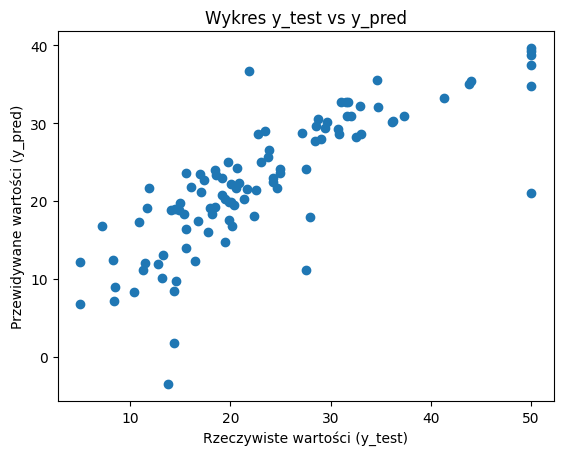

In [ ]:
y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Rzeczywiste wartości (y_test)")
plt.ylabel("Przewidywane wartości (y_pred)")
plt.title("Wykres y_test vs y_pred")
plt.show()

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", round(mae, 2))
print("Mean Squared Error (MSE):", round(mse, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))
print("R-squared (R2):", round(r2, 4))

Mean Absolute Error (MAE): 4.29
Mean Squared Error (MSE): 39.52
Root Mean Squared Error (RMSE): 6.29
R-squared (R2): 0.6477


In [ ]:
ridge = Ridge(alpha=0.5)

ridge.fit(X_train, y_train)

print("Ridge - Współczynniki nachylenia (coef_):", ridge.coef_)
print("Ridge - Punkt przecięcia (intercept_):", ridge.intercept_)

y_pred_ridge = ridge.predict(X_test)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = root_mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge - Mean Absolute Error (MAE):", round(mae_ridge, 2))
print("Ridge - Mean Squared Error (MSE):", round(mse_ridge, 2))
print("Ridge - Root Mean Squared Error (RMSE):", round(rmse_ridge, 2))
print("Ridge - R-squared (R2):", round(r2_ridge, 4))

Ridge - Współczynniki nachylenia (coef_): [ 4.67336013 -0.86963862 -0.56666171]
Ridge - Punkt przecięcia (intercept_): 16.201404233752644
Ridge - Mean Absolute Error (MAE): 4.29
Ridge - Mean Squared Error (MSE): 39.52
Ridge - Root Mean Squared Error (RMSE): 6.29
Ridge - R-squared (R2): 0.6478


In [ ]:
lasso = Lasso(alpha=0.5)

lasso.fit(X_train, y_train)

print("Lasso - Współczynniki nachylenia (coef_):", lasso.coef_)
print("Lasso - Punkt przecięcia (intercept_):", lasso.intercept_)

y_pred_lasso = lasso.predict(X_test)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = root_mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso - Mean Absolute Error (MAE):", round(mae_lasso, 2))
print("Lasso - Mean Squared Error (MSE):", round(mse_lasso, 2))
print("Lasso - Root Mean Squared Error (RMSE):", round(rmse_lasso, 2))
print("Lasso - R-squared (R2):", round(r2_lasso, 4))

Lasso - Współczynniki nachylenia (coef_): [ 3.09328513 -0.82141781 -0.65559482]
Lasso - Punkt przecięcia (intercept_): 26.350031174590754
Lasso - Mean Absolute Error (MAE): 4.37
Lasso - Mean Squared Error (MSE): 40.03
Lasso - Root Mean Squared Error (RMSE): 6.33
Lasso - R-squared (R2): 0.6432


In [ ]:
elastic = ElasticNet(alpha=0.5, l1_ratio=0.5)

elastic.fit(X_train, y_train)

print("ElasticNet - Współczynniki nachylenia (coef_):", elastic.coef_)
print("ElasticNet - Punkt przecięcia (intercept_):", elastic.intercept_)

y_pred_elastic = elastic.predict(X_test)

mae_elastic = mean_absolute_error(y_test, y_pred_elastic)
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
rmse_elastic = root_mean_squared_error(y_test, y_pred_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)

print("ElasticNet - Mean Absolute Error (MAE):", round(mae_elastic, 2))
print("ElasticNet - Mean Squared Error (MSE):", round(mse_elastic, 2))
print("ElasticNet - Root Mean Squared Error (RMSE):", round(rmse_elastic, 2))
print("ElasticNet - R-squared (R2):", round(r2_elastic, 4))

ElasticNet - Współczynniki nachylenia (coef_): [ 2.10117737 -0.86827762 -0.7097906 ]
ElasticNet - Punkt przecięcia (intercept_): 34.12325204743112
ElasticNet - Mean Absolute Error (MAE): 4.44
ElasticNet - Mean Squared Error (MSE): 41.06
ElasticNet - Root Mean Squared Error (RMSE): 6.41
ElasticNet - R-squared (R2): 0.634


**Zad. 2.1**

In [ ]:
from sklearn.preprocessing import StandardScaler

**Zad. 2.2**

In [ ]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(df.drop('MEDV', axis=1))

y = df['MEDV']

df_scaled = pd.DataFrame(X_scaled, columns=df.drop('MEDV', axis=1).columns)

df_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=101)

**Zad. 2.3**

In [ ]:
scaler.fit(X_train)

StandardScaler()

**Zad. 2.4**

In [ ]:
scaled_X_train = scaler.transform(X_train)

**Zad. 2.5**

In [ ]:
scaled_X_test = scaler.transform(X_test)

**Zad. 2.6**

In [ ]:
std_model = LinearRegression()
std_model.fit(scaled_X_train, y_train)

LinearRegression()

**Zad. 2.7**

In [ ]:
print("Współczynniki nachylenia (coef_):", std_model.coef_)
print("Punkt przecięcia (intercept_):", std_model.intercept_)

Współczynniki nachylenia (coef_): [-0.79122527  0.95297591  0.11484236  0.76526816 -1.7739148   2.70386142
 -0.0234735  -3.01184276  2.31803484 -1.76927368 -1.90794551  0.75690641
 -3.75539706]
Punkt przecięcia (intercept_): 22.33688118811881


**Zad. 2.8**

In [ ]:
y_pred = std_model.predict(scaled_X_test)

**Zad. 2.9**

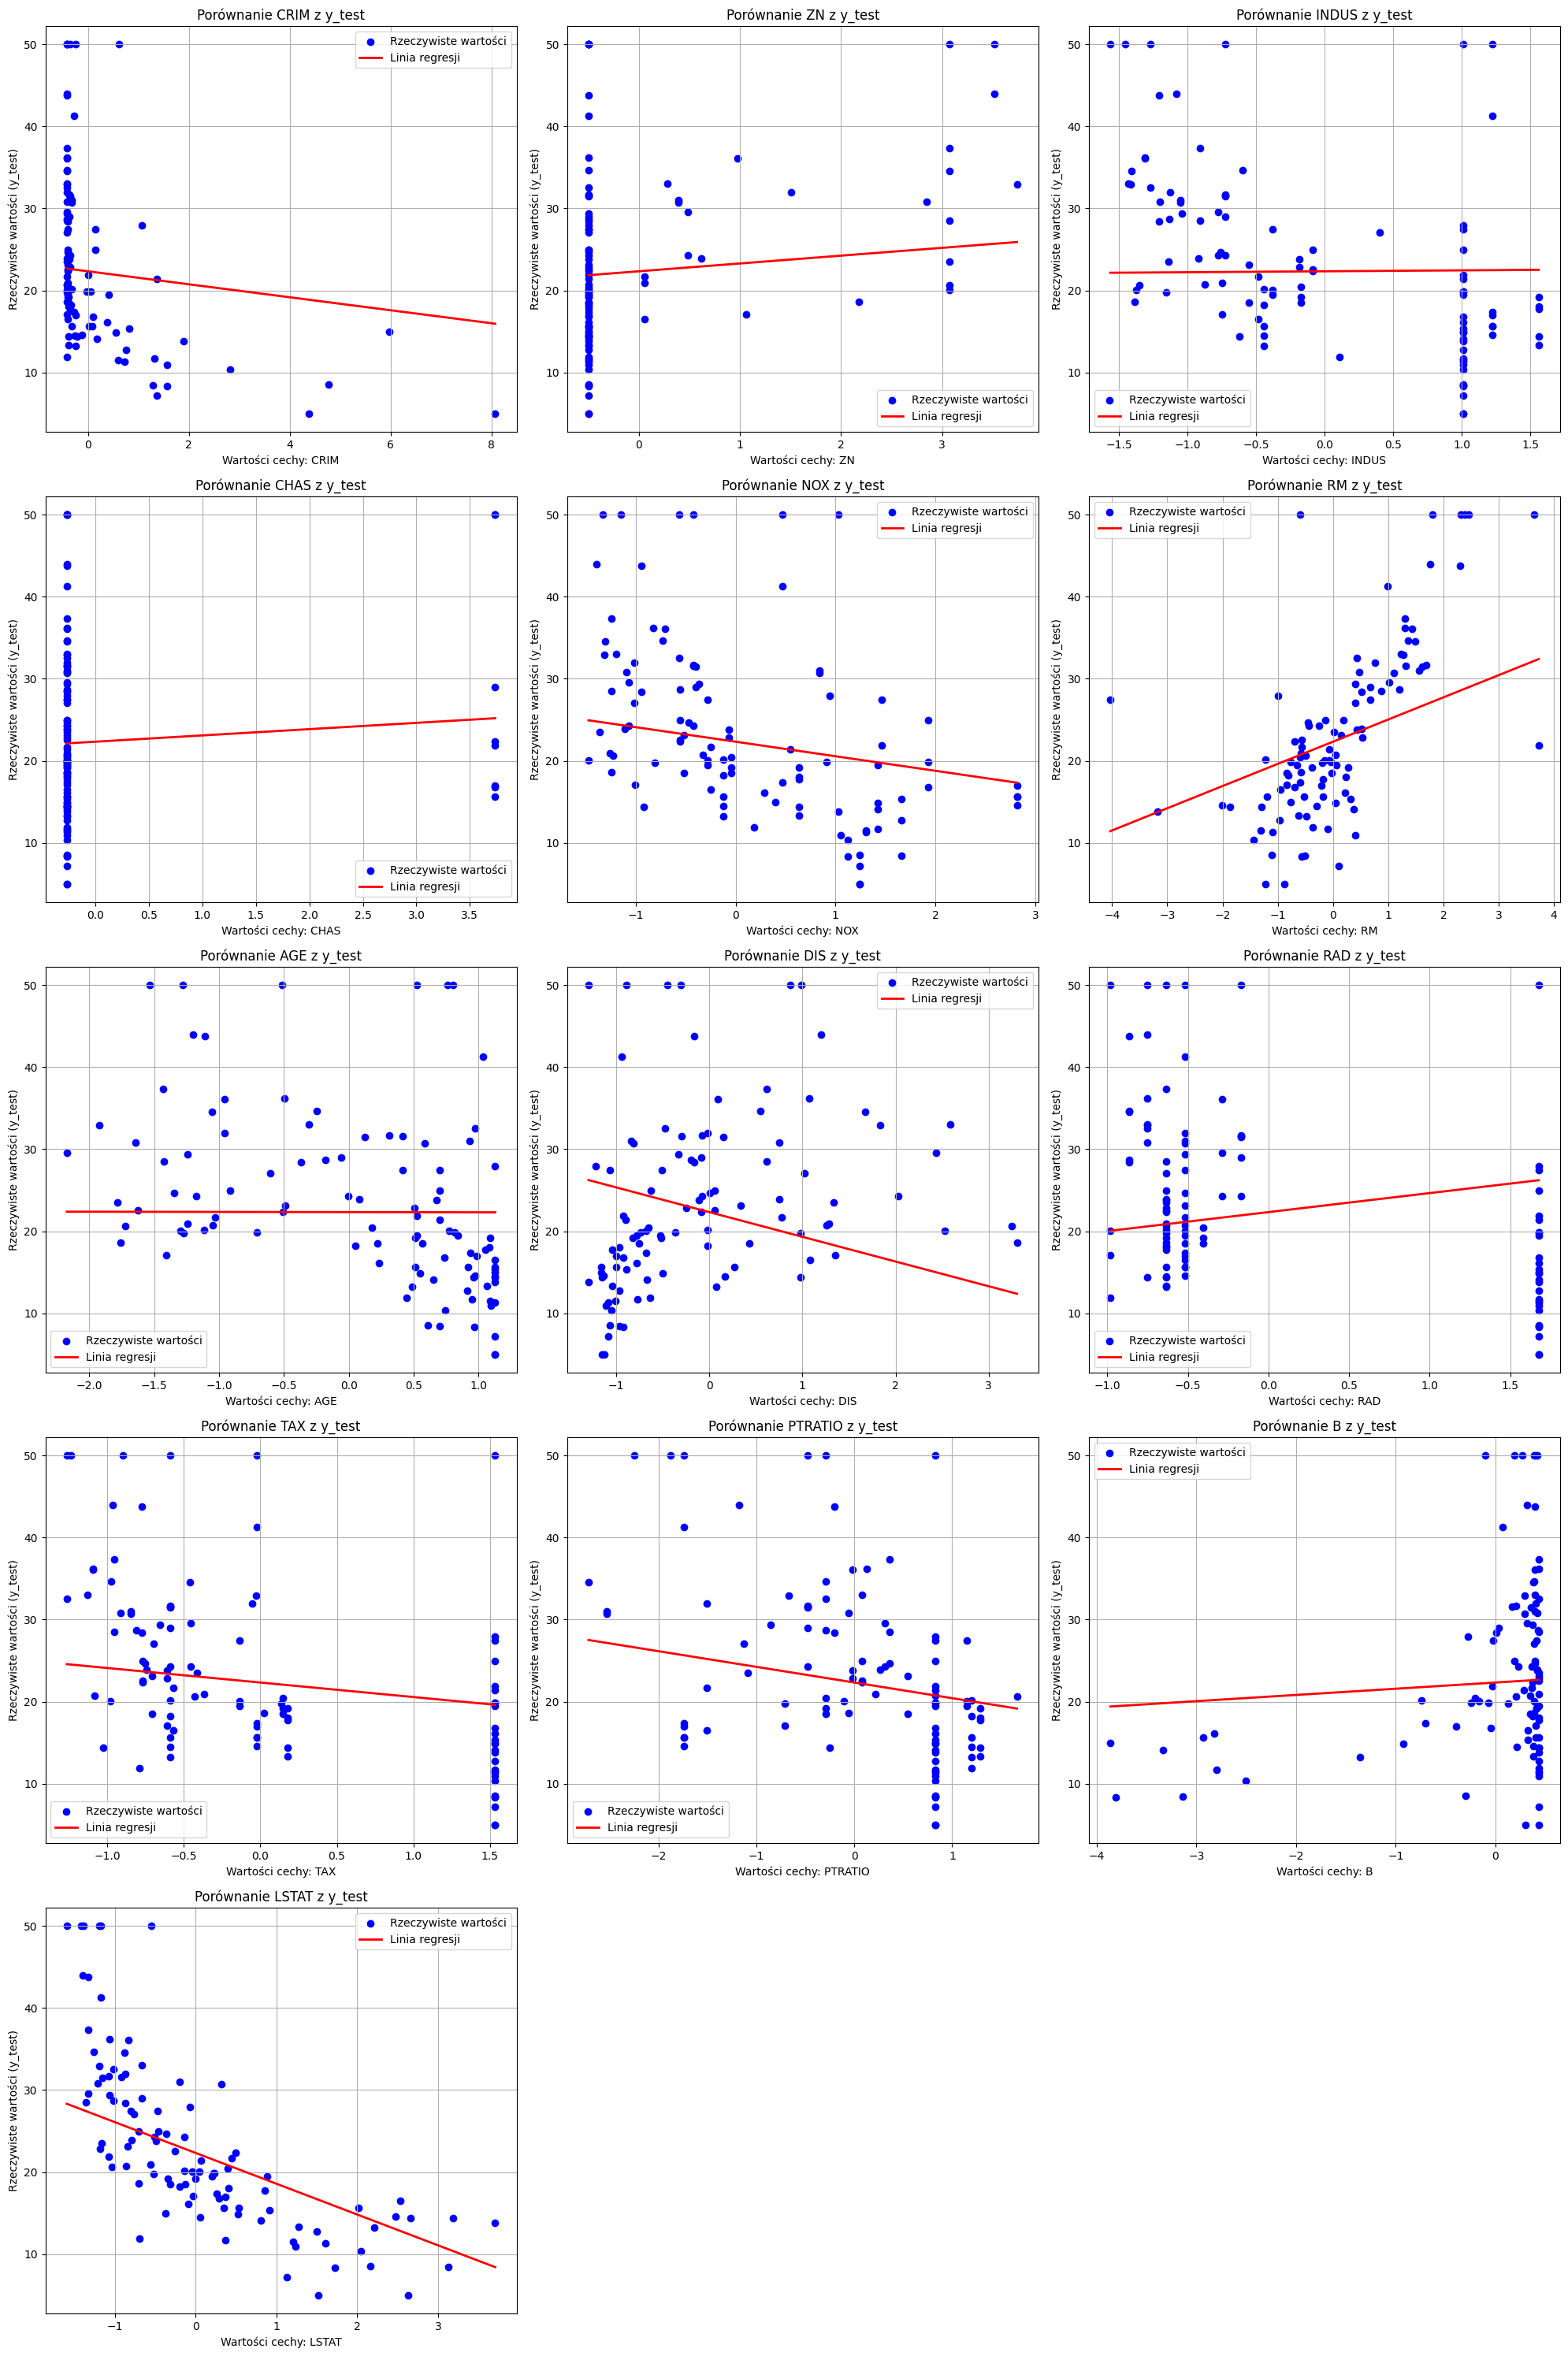

In [ ]:
num_features = scaled_X_test.shape[1]

model = LinearRegression()

plt.figure(figsize=(20, 30))

for i in range(num_features):
    scaled_X_test_column = scaled_X_test[:, i]

    y_pred = model.fit(scaled_X_train, y_train).predict(scaled_X_test)

    plt.subplot(5, 3, i + 1)
    plt.scatter(scaled_X_test_column, y_test, color='blue', label='Rzeczywiste wartości')

    line_x = np.linspace(scaled_X_test_column.min(), scaled_X_test_column.max(), 100)
    line_y = model.intercept_ + model.coef_[i] * line_x

    plt.plot(line_x, line_y, color='red', linewidth=2, label='Linia regresji')

    plt.title(f'Porównanie {df.columns[i]} z y_test')
    plt.xlabel(f'Wartości cechy: {df.columns[i]}')
    plt.ylabel('Rzeczywiste wartości (y_test)')
    plt.legend()
    plt.grid()


plt.tight_layout()
plt.show()


**Zad. 2.10**

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Ewaluacja modelu (po standaryzacji):")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

Ewaluacja modelu (po standaryzacji):
MAE: 4.00
MSE: 33.27
RMSE: 5.77
R²: 0.70


In [ ]:
linear_model = LinearRegression()
linear_model.fit(scaled_X_train, y_train)
y_pred_linear = linear_model.predict(scaled_X_test)

print("Regresja Liniowa:")
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = root_mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"MAE: {mae_linear:.2f}, MSE: {mse_linear:.2f}, RMSE: {rmse_linear:.2f}, R²: {r2_linear:.4f}\n")


ridge_model = Ridge(alpha=0.5)
ridge_model.fit(scaled_X_train, y_train)
y_pred_ridge = ridge_model.predict(scaled_X_test)

print("Regresja Grzbietowa (Ridge):")
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = root_mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"MAE: {mae_ridge:.2f}, MSE: {mse_ridge:.2f}, RMSE: {rmse_ridge:.2f}, R²: {r2_ridge:.4f}\n")


lasso_model = Lasso(alpha=0.5)
lasso_model.fit(scaled_X_train, y_train)
y_pred_lasso = lasso_model.predict(scaled_X_test)

print("Regresja Lasso:")
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = root_mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"MAE: {mae_lasso:.2f}, MSE: {mse_lasso:.2f}, RMSE: {rmse_lasso:.2f}, R²: {r2_lasso:.4f}\n")


elastic_model = ElasticNet(alpha=0.5, l1_ratio=0.5)
elastic_model.fit(scaled_X_train, y_train)
y_pred_elastic = elastic_model.predict(scaled_X_test)

print("Regresja Elastyczna Siatka (ElasticNet):")
mae_elastic = mean_absolute_error(y_test, y_pred_elastic)
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
rmse_elastic = root_mean_squared_error(y_test, y_pred_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)

print(f"MAE: {mae_elastic:.2f}, MSE: {mse_elastic:.2f}, RMSE: {rmse_elastic:.2f}, R²: {r2_elastic:.4f}\n")

Regresja Liniowa:
MAE: 4.00, MSE: 33.27, RMSE: 5.77, R²: 0.7035

Regresja Grzbietowa (Ridge):
MAE: 4.00, MSE: 33.28, RMSE: 5.77, R²: 0.7033

Regresja Lasso:
MAE: 4.34, MSE: 39.09, RMSE: 6.25, R²: 0.6516

Regresja Elastyczna Siatka (ElasticNet):
MAE: 4.19, MSE: 38.31, RMSE: 6.19, R²: 0.6585



In [ ]:
X_selected = df[['RM', 'PTRATIO', 'LSTAT']]
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=101)

scaler = StandardScaler()
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

models = {
    "Regresja Liniowa": LinearRegression(),
    "Regresja Grzbietowa (Ridge)": Ridge(alpha=0.5),
    "Regresja Lasso": Lasso(alpha=0.5),
    "Regresja Elastyczna Siatka (ElasticNet)": ElasticNet(alpha=0.5, l1_ratio=0.5)
}


for model_name, model in models.items():
    model.fit(scaled_X_train, y_train)

    y_pred = model.predict(scaled_X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{model_name}:")
    print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}\n")

Regresja Liniowa:
MAE: 4.29, MSE: 39.52, RMSE: 6.29, R²: 0.6477

Regresja Grzbietowa (Ridge):
MAE: 4.29, MSE: 39.52, RMSE: 6.29, R²: 0.6477

Regresja Lasso:
MAE: 4.36, MSE: 40.26, RMSE: 6.35, R²: 0.6411

Regresja Elastyczna Siatka (ElasticNet):
MAE: 4.44, MSE: 41.43, RMSE: 6.44, R²: 0.6307

